In [3]:
import random

In [28]:
class RockPaperScissors():
    def __init__(self, name):
        self.name = name
        self.choices = ['rock','paper', 'scissors']

    def get_computer_choice(self):
        return random.choice(self.choices)


    def get_user_choice(self):
        user_choice = input(f"please enter your choice ({self.choices}): ")
        if user_choice.lower() in self.choices:
            return user_choice.lower()
        print(f"Invalid choice! You must choose fron ({self.choices})")
        return self.get_user_choice()

    def decide_winner(self, user_choice, computer_choice):
        if user_choice == computer_choice:
            return "It's a tie!"
        win_combinations = [('rock', 'scissors'), ('paper', 'rock'), ('scissors', 'paper')]
        for win_comb in win_combinations:
            if (user_choice == win_comb[0]) & (computer_choice == win_comb[1]):
                return 'Congratulations! You won!'
        return "Oh! The computer won!"


    def play(self):
        user_choice = self.get_user_choice()
        computer_choice = self.get_computer_choice()
        print(f"user_choice: {user_choice},\ncomputer_choice: {computer_choice}")
        print(self.decide_winner(user_choice, computer_choice))




The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [29]:
game = RockPaperScissors('Elham')
while True:
    game.play()

    continue_game = input('Do you want to play again? (Enter any key to play again. Enter q/Q to exit!)')
    if continue_game.lower() == 'q':
        break

user_choice: rock,
computer_choice: scissors
Congratulations! You won!
user_choice: rock,
computer_choice: paper
Oh! The computer won!
user_choice: paper,
computer_choice: scissors
Oh! The computer won!
user_choice: paper,
computer_choice: paper
It's a tie!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
n_samples = 10000

# Proposal distribution: q(x) ~ N(0, 1)
proposal_samples = np.random.normal(loc=0, scale=1, size=n_samples)
q_pdf = lambda x: (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
# Unnormalized target density (known up to constant)
unnormalized_p = lambda x: np.exp(-x**4 / 4)

# Function we want to compute expectation of under p
h = lambda x: x**2

# Importance weights (unnormalized)
weights_unnormalized = unnormalized_p(proposal_samples) / q_pdf(proposal_samples)

# Normalize weights
weights = weights_unnormalized / np.sum(weights_unnormalized)

# Estimate E_p[h(x)]
estimate = np.sum(h(proposal_samples) * weights)
print("Estimated E_p[x^2] ≈", estimate)


[1.25011716e-04 1.07040317e-04 1.13667678e-04 ... 1.09570435e-04
 9.80270017e-05 1.17403575e-04]
Estimated E_p[x^2] ≈ 0.681435600055153


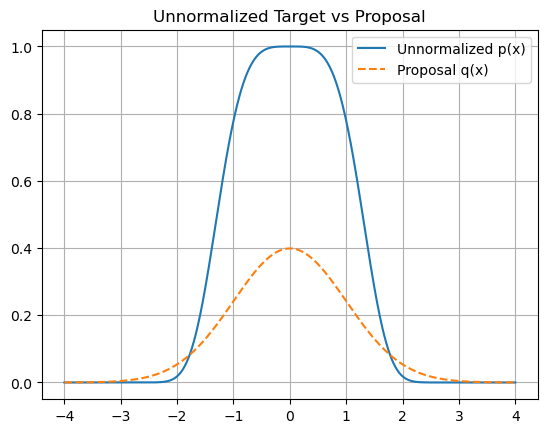

In [6]:
# Plot target vs proposal (unnormalized)
x_vals = np.linspace(-4, 4, 500)
plt.plot(x_vals, unnormalized_p(x_vals), label='Unnormalized p(x)')
plt.plot(x_vals, q_pdf(x_vals), label='Proposal q(x)', linestyle='--')
plt.title("Unnormalized Target vs Proposal")
plt.legend()
plt.grid(True)
plt.show()


RuntimeError: x must be a sequence

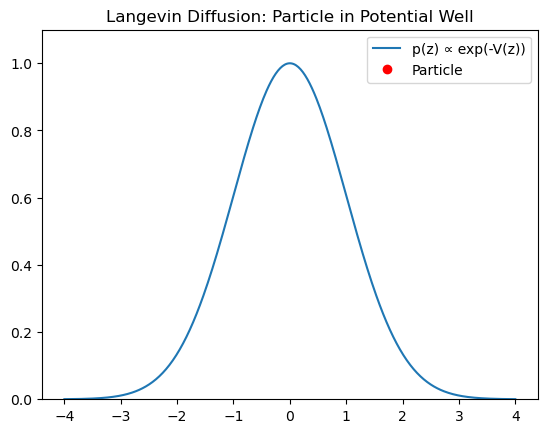

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set random seed for reproducibility
np.random.seed(42)

# Define potential function and corresponding p(z)
def potential(z):
    return 0.5 * z**2  # Quadratic potential

def p(z):
    return np.exp(-potential(z))  # Unnormalized density (Gaussian-like)

# Langevin update
def langevin_update(z, step_size, noise_scale):
    grad_log_p = -z  # Since log p(z) = -0.5 * z^2 => grad = -z
    noise = np.random.normal(0, noise_scale)
    return z + step_size * grad_log_p + noise

# Parameters
num_steps = 200
step_size = 0.05
noise_scale = np.sqrt(2 * step_size)
z_vals = []
z = np.random.normal()

# Generate trajectory
for _ in range(num_steps):
    z = langevin_update(z, step_size, noise_scale)
    z_vals.append(z)

# Create animation
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 400)
y = p(x)
line, = ax.plot(x, y, label='p(z) ∝ exp(-V(z))')
particle, = ax.plot([], [], 'ro', label='Particle')
ax.set_ylim(0, 1.1)
ax.set_title("Langevin Diffusion: Particle in Potential Well")
ax.legend()

def init():
    particle.set_data([], [])
    return particle,

def update(frame):
    z = z_vals[frame]
    particle.set_data(z, p(z))
    return particle,

ani = animation.FuncAnimation(fig, update, frames=num_steps,
                              init_func=init, blit=True, interval=50)

# Save animation
output_path = "./langevin_diffusion_particle.mp4"
ani.save(output_path, writer='ffmpeg', fps=20)

output_path


'./langevin_diffusion_particle.mp4'

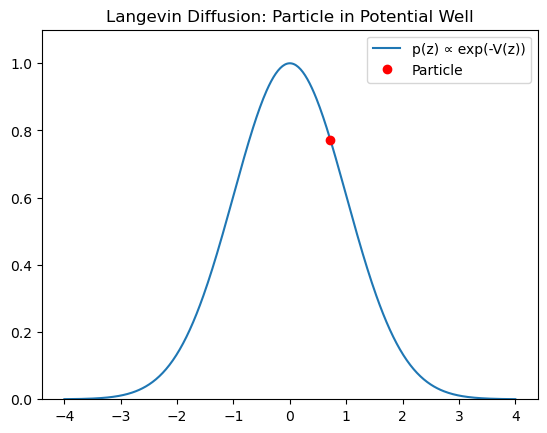

In [13]:
# Re-run the code after environment reset

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set random seed for reproducibility
np.random.seed(42)

# Define potential function and corresponding p(z)
def potential(z):
    return 0.5 * z**2  # Quadratic potential

def p(z):
    return np.exp(-potential(z))  # Unnormalized density (Gaussian-like)

# Langevin update
def langevin_update(z, step_size, noise_scale):
    grad_log_p = -z  # Since log p(z) = -0.5 * z^2 => grad = -z
    noise = np.random.normal(0, noise_scale)
    return z + step_size * grad_log_p + noise

# Parameters
num_steps = 2000
step_size = 0.05
noise_scale = np.sqrt(2 * step_size)
z_vals = []
z = np.random.normal()

# Generate trajectory
for _ in range(num_steps):
    z = langevin_update(z, step_size, noise_scale)
    z_vals.append(z)

# Create animation
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 400)
y = p(x)
line, = ax.plot(x, y, label='p(z) ∝ exp(-V(z))')
particle, = ax.plot([], [], 'ro', label='Particle')
ax.set_ylim(0, 1.1)
ax.set_title("Langevin Diffusion: Particle in Potential Well")
ax.legend()

def init():
    particle.set_data([], [])
    return particle,

def update(frame):
    z = z_vals[frame]
    particle.set_data([z], [p(z)])  # <-- FIXED HERE
    return particle,


ani = animation.FuncAnimation(fig, update, frames=num_steps,
                              init_func=init, blit=True, interval=50)

# Save animation
output_path = "./langevin_diffusion_particle.mp4"
ani.save(output_path, writer='ffmpeg', fps=20)

output_path


'./brownian_motion_path.mp4'

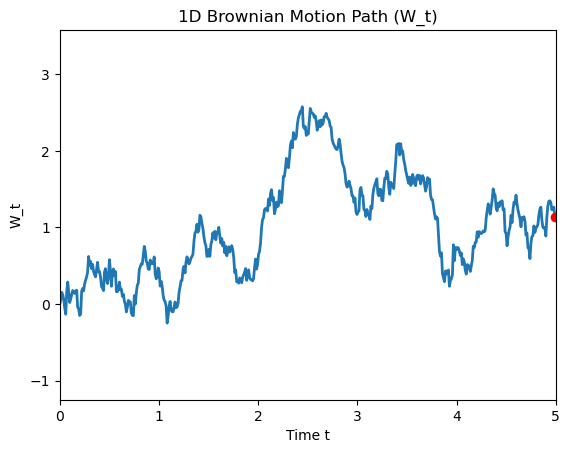

In [15]:
# Fix the error by checking if frame > 0 before accessing x[-1] and y[-1]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters for Brownian motion
T = 5.0              # total time
dt = 0.01            # time step
N = int(T / dt)      # number of steps
times = np.linspace(0, T, N)

# Simulate Brownian motion
W = np.zeros(N)
for i in range(1, N):
    dW = np.random.normal(0, np.sqrt(dt))  # dW_t ~ N(0, dt)
    W[i] = W[i-1] + dW

# Create animation
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
point, = ax.plot([], [], 'ro')
ax.set_xlim(0, T)
ax.set_ylim(np.min(W) - 1, np.max(W) + 1)
ax.set_title("1D Brownian Motion Path (W_t)")
ax.set_xlabel("Time t")
ax.set_ylabel("W_t")

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def update(frame):
    if frame == 0:
        return line, point
    x = times[:frame]
    y = W[:frame]
    line.set_data(x, y)
    point.set_data([x[-1]], [y[-1]])
    return line, point

ani = animation.FuncAnimation(fig, update, frames=N, init_func=init,
                              blit=True, interval=10, repeat=False)

# Save animation
output_path = "./brownian_motion_path.mp4"
ani.save(output_path, writer='ffmpeg', fps=60)

output_path
